In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath('/Users/jonasvvr/Documents/KULeuven/thesis/Soccer-EPV-Framework/LaurieOnTracking/'))

In [2]:
import data_handler as dh
import visualization as viz
import spatial_features as spf
import game_state_representation as gsr
import soccermap_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [3]:
%pip install tensorflow-macos
import tensorflow as tf

You should consider upgrading via the '/Users/jonasvvr/.pyenv/versions/3.10.3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
FIELD_DIMEN = (108, 72)
DATA_DIR_single = '../bru_data/data/comp-4zwgbb66rif2spcoeeol2motx/tmcl-1qtpbdbeudho5i7fu5z2lp2j8/fx-4sekj9hgwxzq3y4ih9415239w'
DATA_DIR = '../bru_data/data/comp-4zwgbb66rif2spcoeeol2motx/tmcl-1qtpbdbeudho5i7fu5z2lp2j8'
SAVE_DIR = '../out/pass_data3.pkl'

event_data_single = dh.read_event_data(DATA_DIR_single)
# event_data = dh.read_dir_event_data(DATA_DIR)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

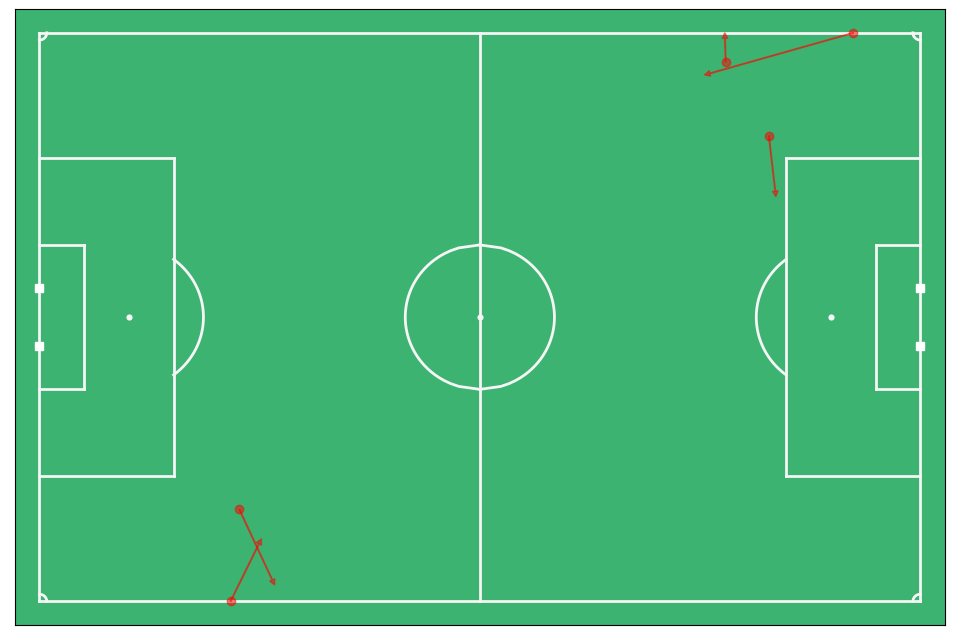

In [5]:
viz.plot_events(event_data_single.iloc[100:110], FIELD_DIMEN)

In [7]:
tracking_single = dh.read_tracking_data(DATA_DIR_single)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

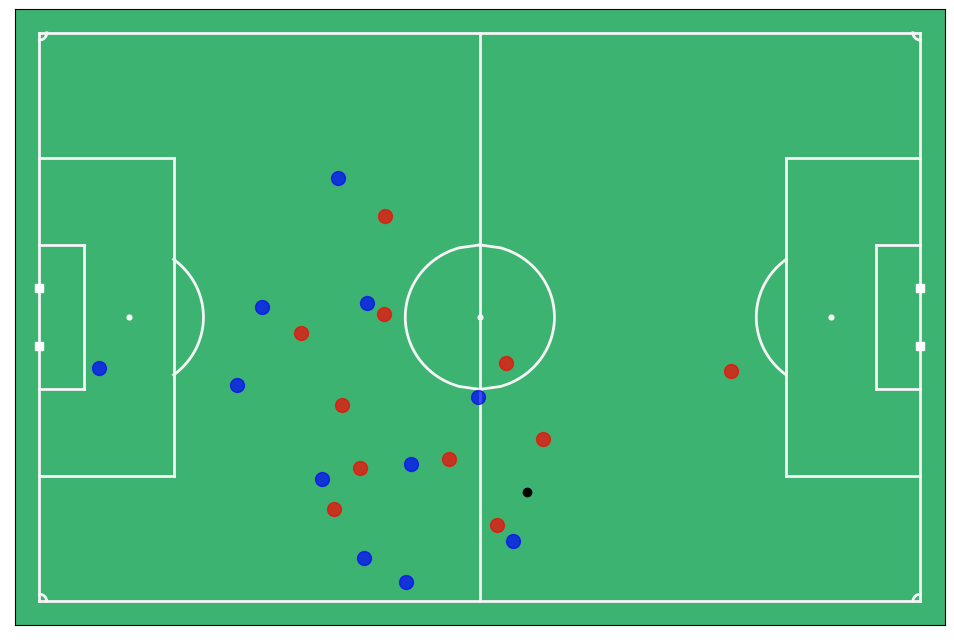

In [8]:
viz.plot_frame(tracking_single.iloc[2316], FIELD_DIMEN)

In [8]:
# passing_events = event_data_single[event_data_single['typeId'] == 1]
# pass_event = passing_events.iloc[119]
#
# match_period = str(pass_event['periodId'])
# timestamp = dh.get_frame(pass_event['timeMin'], pass_event['timeSec'], match_period)
#
# row = tracking_single[(tracking_single['Framecount'] == timestamp) & (tracking_single['Match period'] == match_period)]
# ball_xy = np.array(row['Ball xyz'].iloc[0][:-1])
# ball_carrier = gsr.get_ball_carier(row['Column 5'].iloc[0], ball_xy)
# ball_carrier_xy = np.array([ball_carrier['x'], ball_carrier['y']])
# distance = np.linalg.norm(ball_xy - ball_carrier_xy)
# print(distance)
#
# viz.plot_frame(row.iloc[0], FIELD_DIMEN)

In [9]:
SAVE_DIR = '../out/pass_data3.pkl'


# pass_data = dh.read_event_tracking_data(DATA_DIR, FIELD_DIMEN, SAVE_DIR, num_files=1)
# pass_data.to_pickle(SAVE_DIR, compression='gzip')


In [11]:
pass_data = pd.read_pickle(SAVE_DIR, compression='gzip')
pass_data

Event  \
0    [{'x': 54.0, 'y': 36.0, 'endx': 27.4, 'endy': ...   
1    [{'x': 12.744000000000002, 'y': 0.0, 'endx': 3...   
2    [{'x': 74.19600000000001, 'y': 67.104, 'endx':...   
3    [{'x': 24.516, 'y': 17.712000000000003, 'endx'...   
4    [{'x': 63.93600000000001, 'y': 49.032, 'endx':...   
..                                                 ...   
351  [{'x': 86.292, 'y': 2.088, 'endx': 86.5, 'endy...   
352  [{'x': 93.528, 'y': 2.9519999999999995, 'endx'...   
353  [{'x': 107.46, 'y': 0.36, 'endx': 93.6, 'endy'...   
354  [{'x': 74.736, 'y': 46.008, 'endx': 62.6, 'end...   
355  [{'x': 42.876000000000005, 'y': 72.0, 'endx': ...   

                                          Loc attack x  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
351  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
352  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
353  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
354  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
355  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                          Loc attack y  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
351  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
352  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
353  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
354  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
355  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                          Loc defend x  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
351  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
352  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
353  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
354  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
355  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                          Loc defend y  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
351  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
352  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
353  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
354  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
355  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                             vx attack  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
351  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
352  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
353  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [16]:
pass_data_ = pass_data.drop(['Event'], axis=1)
X = np.asarray(pass_data_.iloc[:,:-1])
y = pass_data_.iloc[:,-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y)

In [15]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))
print(np.mean(y_train))

189
78
0.7078651685393258


In [14]:
loss = 'binary_crossentropy'
optimizer = 'adam'
epochs = 30

soccermap = soccermap_model.SoccerMap(FIELD_DIMEN)
soccermap.compile(loss, optimizer)

In [15]:
soccermap.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pass_input (InputLayer)        [(None, 108, 72, 17  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 104, 68, 32)  13632       ['pass_input[0][0]']             
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 112, 76, 32)  0          ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 108, 72, 64)  51264       ['zero_padding2d[0][0]']     

In [16]:
for i in range(17):
    test = X_train[0,i]
    tf.convert_to_tensor(test)
    print(1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [17]:
soccermap.fit(X_train, y_train, X_test, y_test, epochs)



ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).